In [191]:
import collections
import glob
import itertools
import json
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from kardioml import DATA_PATH

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set up paths

In [2]:
ROOT = os.path.abspath(os.path.join(os.getcwd(), f'./..'))

DATASET = 'C'

DATASET_DIR = os.path.join(ROOT, f'data/{DATASET}')
FORMATTED_DIR = os.path.join(DATASET_DIR, 'formatted' )
RAW_DIR = os.path.join(DATASET_DIR, 'raw')

metadata_filepaths = glob.glob(f'{FORMATTED_DIR}/*.json')
data_filepaths = glob.glob(f'{FORMATTED_DIR}/*.npy')

# Set up data

In [149]:
# metadata
metadata_temp = []
for file in metadata_filepaths:
    metadata_temp.append(json.load(open(file)))
    
metadata_df = pd.DataFrame(metadata_temp)
del metadata_temp

metadata_df['age'] = metadata_df['age'].astype('int')

display(metadata_df[:5])
display(metadata_df.columns)

,filename,datetime,channel_order,age,sex,amp_conversion,fs,length,num_leads,labels_SNOMEDCT,labels,labels_full,shape,hr,rpeaks,rpeak_array,rpeak_times,labels_unscored_SNOMEDCT,labels_unscored,labels_unscored_full
0,I0002,15-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",65,female,306000,257,462600,12,None,None,None,"[462600, 12]",92.710609,"[[13, 194, 377, 587, 748, 933, 1120, 1307, 151...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[0.0, 0.05058365758754864], [0.75097276264591...","[53741008, 251180001, 251182009]","[CHD, VTrig, VPVC]","[coronary heart disease, ventricular trigeminy..."
1,I0053,15-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",56,male,617000,257,462600,12,None,None,None,"[462600, 12]",89.899406,"[[52, 283, 315, 476, 638, 799, 924, 1053, 1116...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.20233463035019456, 0.2140077821011673], [0...","[251182009, 164884008]","[VPVC, VEB]","[paired ventricular premature complexes, ventr..."
2,I0057,15-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",45,female,1041000,257,462600,12,[427084000],[STach],[sinus tachycardia],"[462600, 12]",97.597543,"[[150, 307, 467, 622, 764, 937, 1097, 1256, 14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.5836575875486382, 0.6070038910505836], [1....","[53741008, 251182009, 13640000]","[CHD, VPVC, FB]","[coronary heart disease, paired ventricular pr..."
3,I0045,15-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",53,female,612000,257,462600,12,None,None,None,"[462600, 12]",73.382906,"[[302, 438, 765, 1003, 1136, 1468, 1708, 1843,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.245136186770428, 0.26459143968871596], [1....","[164873001, 53741008, 251182009]","[LVH, CHD, VPVC]","[left ventricular hypertrophy, coronary heart ..."
4,I0067,15-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",58,female,623000,257,462600,12,[427084000],[STach],[sinus tachycardia],"[462600, 12]",103.500843,"[[173, 201, 303, 546, 705, 753, 907, 1061, 112...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[0.0, 0.08560311284046693], [0.67315175097276...",[425856008],[PVT],[paroxysmal ventricular tachycardia]


Index(['filename', 'datetime', 'channel_order', 'age', 'sex', 'amp_conversion',
       'fs', 'length', 'num_leads', 'labels_SNOMEDCT', 'labels', 'labels_full',
       'shape', 'hr', 'rpeaks', 'rpeak_array', 'rpeak_times',
       'labels_unscored_SNOMEDCT', 'labels_unscored', 'labels_unscored_full'],
      dtype='object')

# Age distribution statistics and histograms

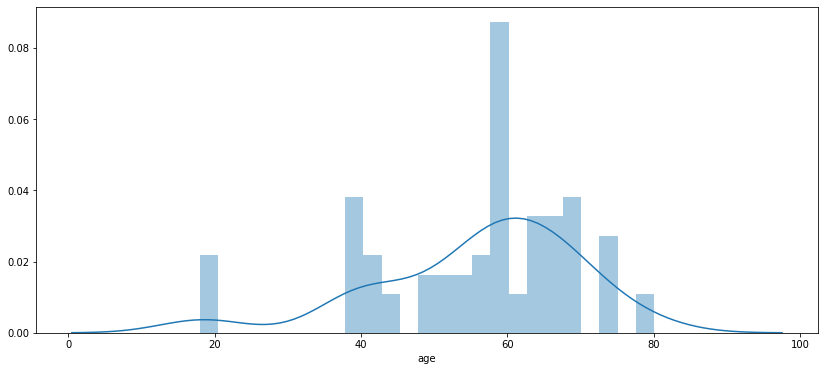

In [45]:
plt.figure(figsize=(14,6))
sns.distplot(metadata_df['age'], bins=25)

In [156]:
metadata_df['age'].describe()

count    74.000000
mean     55.986486
std      13.884547
min      18.000000
25%      49.000000
50%      59.000000
75%      66.000000
max      80.000000
Name: age, dtype: float64

# Male/Female split

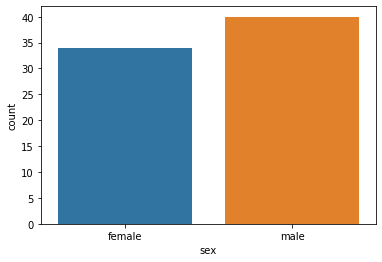

In [6]:
sns.countplot(metadata_df['sex'])

# Distribution statistics and histograms of segment lengths

In [184]:
display(f'Unique lengths: {metadata_df["length"].unique()}')
display(f'Unique shapes:  {metadata_df["shape"].astype(str).unique()}')
display(f'Unique freqs:   {metadata_df["fs"].unique()}')

print(f'All segments are {metadata_df["length"].iloc[0]/257/60/60:.3f} hours long at 257 Hz')

'Unique lengths: [462600]'

"Unique shapes:  ['[462600, 12]']"

'Unique freqs:   [257]'

All segments are 0.500 hours long at 257 Hz


# Label composition (e.g. 60% Normal Sinus Rhythm, etc.)

[(0, 100), Text(0, 0.5, '%')]

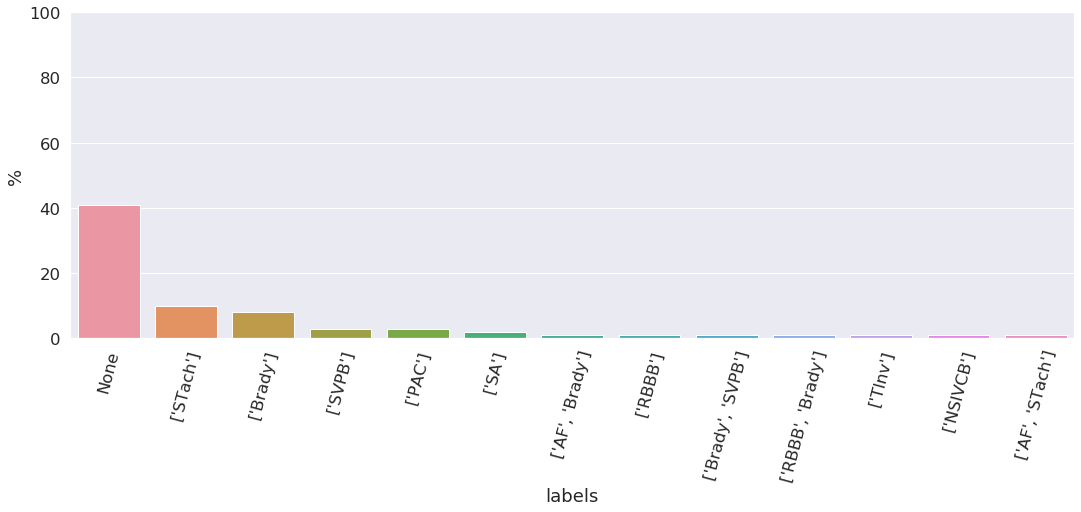

In [166]:
plt.figure(figsize=(18,6))

chart = sns.countplot(metadata_df['labels'].astype(str),
                     order=metadata_df['labels'].astype(str).value_counts().index)

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75)
chart.set(ylabel='%',
          ylim=(0,100))

# Unique label combinations and their proportions

In [190]:
display(metadata_df['labels'].value_counts(dropna=False))

NaN              41
[STach]          10
[Brady]           8
[SVPB]            3
[PAC]             3
[SA]              2
[AF, Brady]       1
[Brady, SVPB]     1
[NSIVCB]          1
[AF, STach]       1
[RBBB, Brady]     1
[TInv]            1
[RBBB]            1
Name: labels, dtype: int64

In [210]:
collections.Counter(itertools.chain.from_iterable(metadata_df['labels'].fillna(' ')))

Counter({' ': 41,
         'STach': 11,
         'NSIVCB': 1,
         'Brady': 11,
         'RBBB': 2,
         'SA': 2,
         'AF': 2,
         'SVPB': 4,
         'PAC': 3,
         'TInv': 1})

In [ ]:
collections.Counter(metadata_df['labels'].fillna('').apply(len))

In [212]:
# If there is an associated paper, please read and provide a summary. Importantly, how were the labels generated, additional information about the population?

Counter({0: 41, 1: 29, 2: 4})

# If there is an associated paper, please read and provide a summary. Importantly, how were the labels generated, additional information about the population?

# Heart Rate

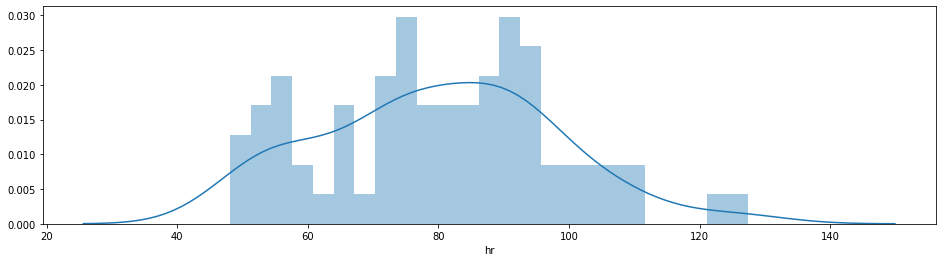

In [56]:
plt.figure(figsize=(16,4))
sns.distplot(metadata_df['hr'], bins=25)

# Missingness

,labels,labels_SNOMEDCT,labels_full,labels_unscored,labels_unscored_SNOMEDCT,labels_unscored_full,fs,length,num_leads,amp_conversion,datetime,sex,shape,hr,rpeaks,rpeak_array,rpeak_times,age,channel_order,filename
missingness_%,55.4,55.4,55.4,1.4,1.4,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


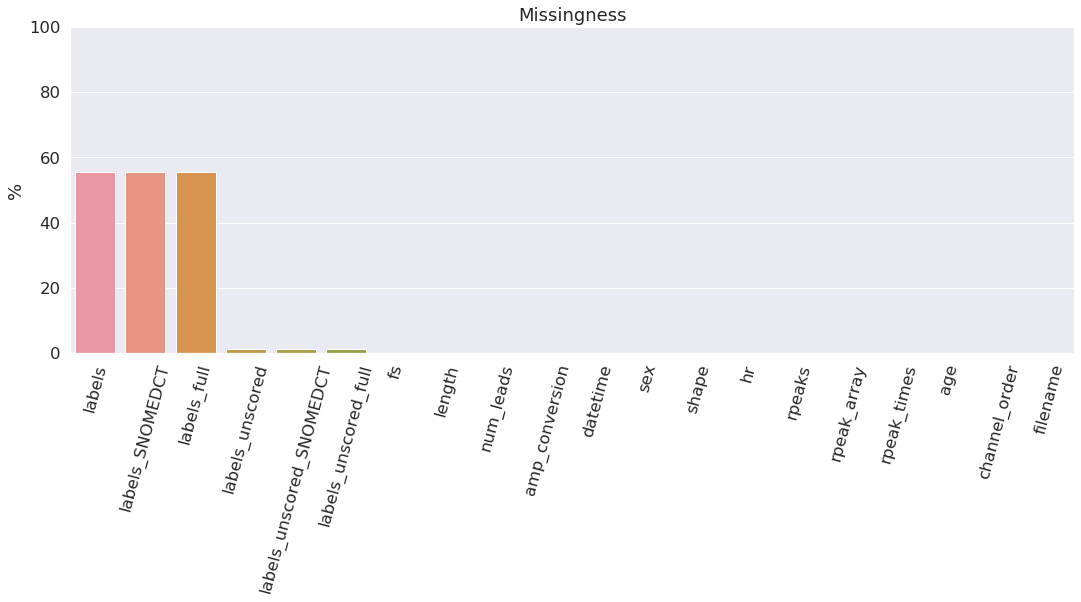

In [142]:
missingness = pd.DataFrame(metadata_df.isna().mean().round(3)* 100,
                          columns=['missingness_%']).transpose().sort_values(by='missingness_%', 
                                                                             axis=1, 
                                                                             ascending=False)
plt.figure(figsize=(18,6))

chart = sns.barplot(data=missingness)

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75)
chart.set(title='Missingness',
          ylabel='%',
          ylim=(0,100))

display(missingness)